In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# First attempt

([], [])

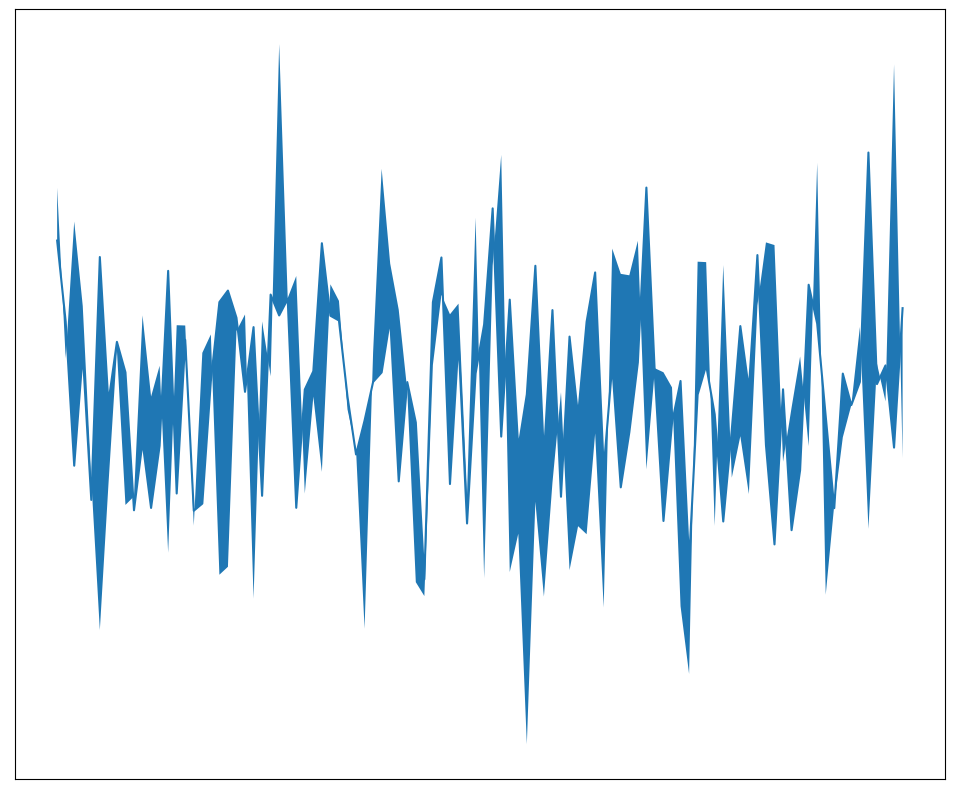

In [2]:
x = np.arange(100)
y1 = np.random.normal(0, 1, 100) + np.sin((x-5))
y2 = np.random.normal(0, 2, 100) + np.sin(x)

plt.figure(figsize=(12,10))
plt.plot(y1)
plt.fill_between(x, y1=y1, y2=y2)
plt.xticks([])
plt.yticks([])

# Second attempt
- dark background
- add gaps in fill_between
- sine vs. cosine

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

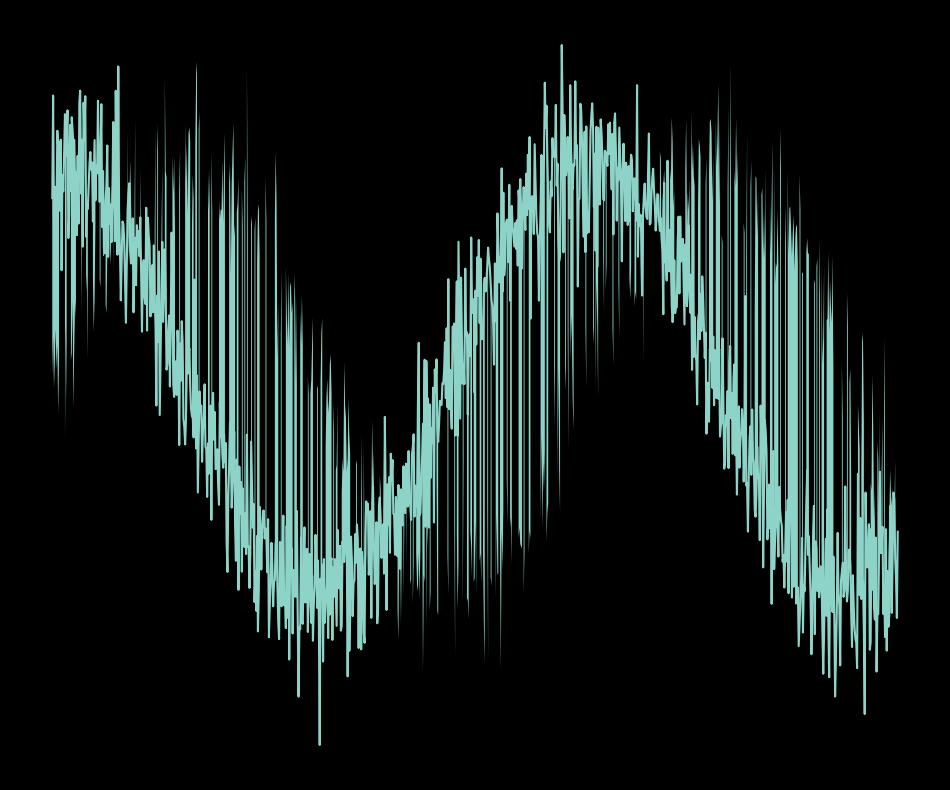

In [4]:
plt.style.use('dark_background')
n = 1000
x = np.arange(n)
y1 = np.random.normal(0, 0.2, n) + np.cos(x/100)
y2 = np.random.normal(0, 0.2, n) + np.sin(x/100)

plt.figure(figsize=(12,10))
plt.plot(y1)
n_ones = int(np.floor(n*0.6))
plt.fill_between(x, y1=y1, y2=y2, where=np.random.permutation(np.array([1]*n_ones + [0]*(n-n_ones))))
#plt.plot(y1, c='r')
plt.gca().set_axis_off()

# Third attempt
- playing with colors
- add linear scaling of sinusoids

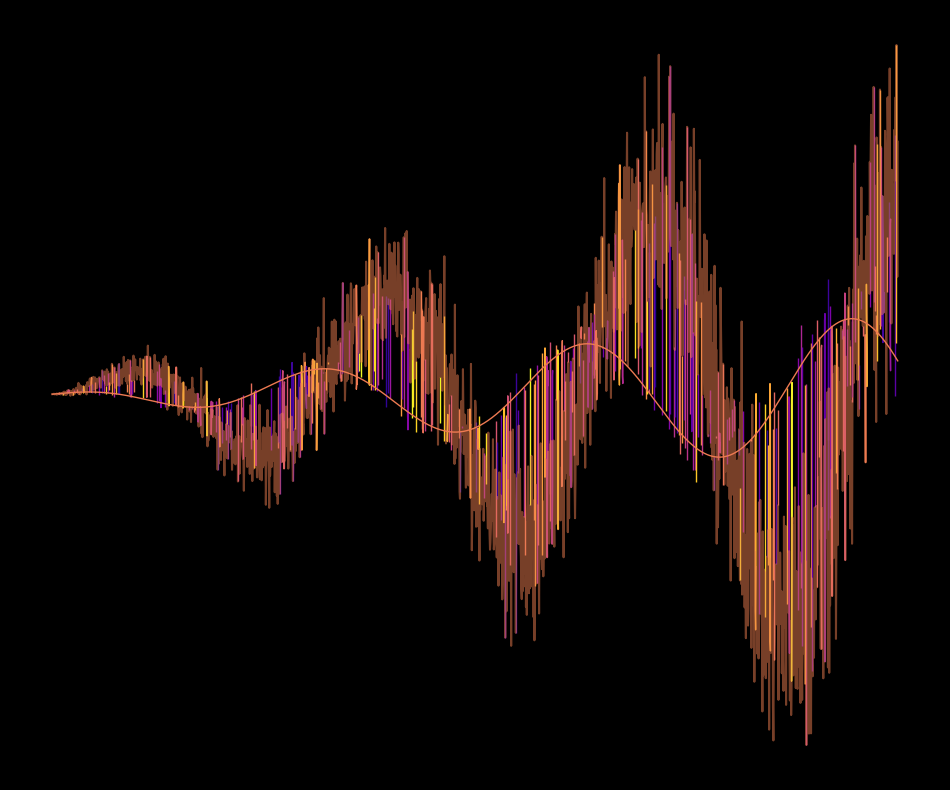

In [5]:
plt.style.use('dark_background')
n = 2000
x = np.arange(n)
y1 = (np.random.normal(0, 0.3, n) + np.cos(x/100))*x/n*0.3
y1_denoised = np.cos(x/100)*x/n*0.3
y2 = (np.random.normal(0, 0.3, n) + np.sin(x/100))*x/n

plt.figure(figsize=(12,10))
my_cm1 = plt.cm.plasma
my_cm2 = plt.cm.plasma
plt.plot(y2, color=my_cm1(np.random.randint(1, 256)), alpha=0.5)
plt.plot(y1_denoised, color=my_cm1(np.random.randint(1, 256)), lw=1)
#plt.plot(y1, color=my_cm2(np.random.randint(1, 256)), alpha=0.5)
n_ones = int(np.floor(n*0.2))
plt.fill_between(x, y1=y1, y2=y2, where=np.random.permutation(np.array([1]*n_ones + [0]*(n-n_ones))), color=my_cm2(np.random.randint(1, 256, size=n)))
plt.gca().set_axis_off()

# 4
- add a circular/spiral element

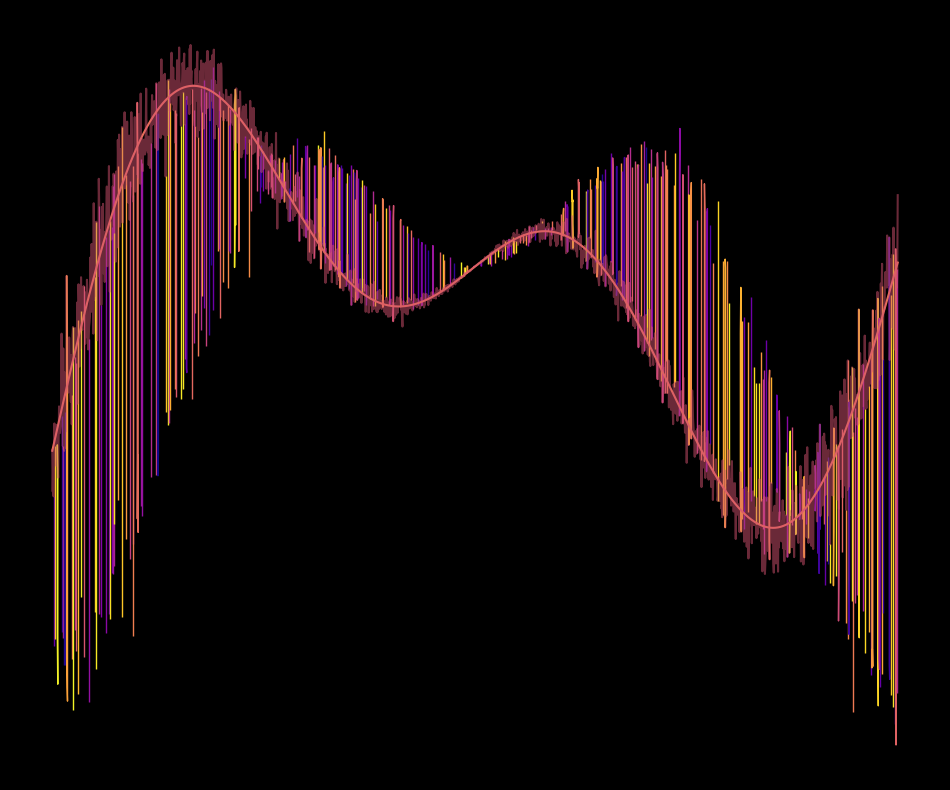

In [6]:
plt.style.use('dark_background')
n = 2000
r = 1
scale = r/n
x = np.arange(-(n//2), (n//2)) * scale
y_circle = np.sqrt(r**2 - x**2)
y1 = (np.random.normal(0, 0.1, n) + np.cos(x*10))*x + y_circle
y1_denoised = np.cos(x*10)*x + y_circle
y2 = (np.random.normal(0, 0.1, n) + np.sin(x*10))*x + y_circle

plt.figure(figsize=(12,10))
my_cm1 = plt.cm.plasma
my_cm2 = plt.cm.plasma
plt.plot(x, y1_denoised, color=my_cm1(np.random.randint(1, 256)))
plt.plot(x, y1, color=my_cm2(np.random.randint(1, 256)), alpha=0.5)
n_ones = int(np.floor(n*0.2))
plt.fill_between(x, y1=y1, y2=y2, where=np.random.permutation(np.array([1]*n_ones + [0]*(n-n_ones))), color=my_cm2(np.random.randint(1, 256, size=n)))
plt.gca().set_axis_off()

## Meh...

# 5
- mess with x coordinates
- reduce noise again

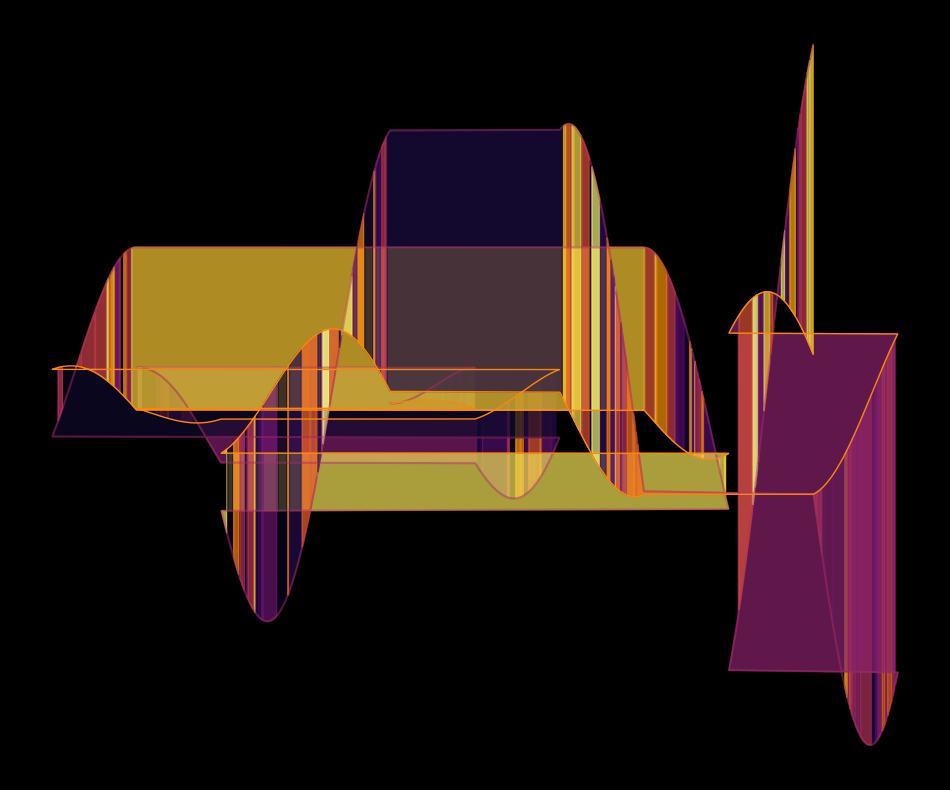

In [7]:
plt.style.use('dark_background')
my_seed = 2
np.random.seed(my_seed)
n = 2000
x = np.arange(n)
n_parts = 10
part_size = n//n_parts
x_distorted = np.concatenate(np.random.permutation([x[start:start+part_size] for start in np.arange(n, step=part_size)]))
y1 = (np.random.normal(0, 0.3, n)*0 + np.cos(x/100))*x/n*0.3
y1_denoised = np.cos(x/100)*x/n*0.3
y2 = (np.random.normal(0, 0.3, n)*0 + np.sin(x/100))*x/n

plt.figure(figsize=(12,10))
my_cm1 = plt.cm.inferno
my_cm2 = plt.cm.inferno
plt.plot(x_distorted, y2, color=my_cm1(np.random.randint(1, 256)), alpha=0.5)
plt.plot(x_distorted, y1_denoised, color=my_cm1(np.random.randint(1, 256)), lw=1)
#plt.plot(y1, color=my_cm2(np.random.randint(1, 256)), alpha=0.5)
n_ones = int(np.floor(n*0.9))
plt.fill_between(
    x_distorted,
    y1=y1,
    y2=y2,
    where=np.random.permutation(np.array([1]*n_ones + [0]*(n-n_ones))),
    color=my_cm2(np.random.randint(1, 256, size=n)),
    alpha=0.7
)
plt.gca().set_axis_off()
plt.savefig(f'first_gen_art_seed_{my_seed}.png')

# Make it interactive :)

In [8]:
import ipywidgets as widgets
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

In [9]:
possible_colormaps = plt.colormaps()

In [30]:
def build_curves(n=2000, n_parts=10, noise_factor=0, seed=2, max_x_shift=0, max_y_shift=0):
    np.random.seed(seed)
    x = np.arange(n)
    part_size = n//n_parts
    
    x_chunks = [x[start:start+part_size] for start in np.arange(n, step=part_size)]
    x_chunks = [chunk for chunk in x_chunks if len(chunk) == part_size]
    
    for chunk in x_chunks:
        chunk = chunk + np.random.randint(-max_x_shift, max_x_shift)
    
    x_distorted = np.concatenate(np.random.permutation(x_chunks))
    x = x[:len(x_distorted)]
    n = len(x)
    
    y1 = (np.random.normal(0, 0.3, n)*noise_factor + np.cos(x/100))*x/n*0.3
    y1_denoised = np.cos(x/100)*x/n*0.3
    
    y2 = (np.random.normal(0, 0.3, n)*noise_factor + np.sin(x/100))*x/n
    
    for chunk in x_chunks:
        y1[chunk] = y1[chunk] + np.random.rand()*max_y_shift
        y2[chunk] = y2[chunk] + np.random.rand()*max_y_shift
    
    return x, x_distorted, y1, y2, y1_denoised

def plot_curves(x, x_distorted, y1, y2, y1_denoised, cmap_name, filling_ratio):
    fig = plt.figure(figsize=(8,8));
    cmap = plt.cm.get_cmap(cmap_name);

    plt.plot(x_distorted, y2, color=cmap(np.random.randint(1, 256)), alpha=0.5);
    plt.plot(x_distorted, y1_denoised, color=cmap(np.random.randint(1, 256)), lw=1);
    
    n_ones = int(np.floor(len(x)*filling_ratio))
    plt.fill_between(
        x_distorted,
        y1=y1,
        y2=y2,
        where=np.random.permutation(np.array([1]*n_ones + [0]*(len(x)-n_ones))),
        color=cmap(np.random.randint(1, 256, size=n)),
        alpha=0.7
    );
    plt.gca().set_axis_off();
    return fig
    
def generate_curves(n=2000, n_parts=10, noise_factor=0, seed=2, max_y_shift=10, cmap_name='inferno', filling_ratio=0.9):
    x, x_distorted, y1, y2, y1_denoised = build_curves(n, n_parts, noise_factor, seed,  max_y_shift)
    
    fig = plot_curves(x, x_distorted, y1, y2, y1_denoised, cmap_name, filling_ratio)
    
def save_generated_curves(n=2000, n_parts=10, noise_factor=0, seed=2,  max_y_shift=0, cmap_name='inferno', filling_ratio=0.9):
    x, x_distorted, y1, y2, y1_denoised = build_curves(n, n_parts, noise_factor, seed)
    
    fig = plot_curves(x, x_distorted, y1, y2, y1_denoised, cmap_name, filling_ratio);
    fig.savefig(f'curves_n={n}_n_parts={n_parts}_noise_factor={noise_factor}_seed={seed}_cmap={cmap_name}_filling_ratio={filling_ratio}.png');
    plt.close()

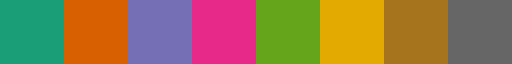

In [22]:
plt.cm.get_cmap('Dark2')

In [23]:
from ipywidgets import Button, HBox, VBox

In [29]:
interactive_plot = interactive(
    generate_curves,
    n=widgets.IntSlider(
        value=2000,
        min=100,
        max=5000,
        step=10
    ),
    n_parts=widgets.IntSlider(
        value=10,
        min=1,
        max=100,
        step=1
    ),
    noise_factor=(0, 1, 0.01),
    seed=(1, 5000),
    max_y_shift=widgets.FloatSlider(
        value=0,
        min=-3,
        max=3,
        step=0.1
    ),
    cmap_name=possible_colormaps,
    filling_ratio=widgets.FloatSlider(min=0.1, max=0.99, step=0.1, value=0.8),
)
output = interactive_plot.children[-1]
output.layout.height = '700px'

button = widgets.Button(
    description='Save as image',
    disabled=False,
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
def save_figure(button):
    save_generated_curves(
        n=interactive_plot.children[0].value,
        n_parts=interactive_plot.children[1].value,
        noise_factor=interactive_plot.children[2].value,
        seed=interactive_plot.children[3].value,
        cmap_name=interactive_plot.children[4].value,
        filling_ratio=interactive_plot.children[5].value
    )
    
button.on_click(save_figure)

HBox([interactive_plot, button])

# Next step
- supress showing of saved figure DONE
- introduce shifts in x and y for the chunks